# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры и довести метрику до 0.59.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Лес-решений" data-toc-modified-id="Лес-решений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лес решений</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 

Загрузим данные, с которыми нам предстоит работать. 

In [115]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


В данном датасете представлены:
* Признаки
    * RowNumber — индекс строки в данных
    * CustomerId — уникальный идентификатор клиента
    * Surname — фамилия
    * CreditScore — кредитный рейтинг
    * Geography — страна проживания
    * Gender — пол
    * Age — возраст
    * Tenure — сколько лет человек является клиентом банка
    * Balance — баланс на счёте
    * NumOfProducts — количество продуктов банка, используемых клиентом
    * HasCrCard — наличие кредитной карты
    * IsActiveMember — активность клиента
    * EstimatedSalary — предполагаемая зарплата
* Целевой признак
    * Exited — факт ухода клиента

Столбцы *RowNumber*, *CustomerId* и *Surname* не влияют на формирование целевого признака, поэтому их можно удалить.

In [116]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Преобразуем категориальные признаки в численные с помощью техники прямого кодирования(One-Hot Encoding).

In [117]:
Geography_ohe = pd.get_dummies(df['Geography'], drop_first=True)
Gender_ohe = pd.get_dummies(df['Gender'], drop_first=True)
df = df.drop(['Geography', 'Gender'], axis = 1)
df = pd.concat([df, Geography_ohe, Gender_ohe], axis = 1)
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


Посмотрим общую информацию о нашем датасете.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Столбец *Tenure* имеет пропуски. Заполним их.

In [119]:
df['Tenure'] = df['Tenure'].fillna(-1)

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 0.6, 0.2 и 0.2.

In [120]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 12345, stratify=df['Exited'])
df_train, df_valid = train_test_split(df_train, test_size = 0.25, random_state = 12345, stratify = df_train['Exited'])

Выведем на экран размеры таблиц, которые хранятся в трех переменных.

In [121]:
print('Обучающая выборка:', df_train.shape)
print('Валидационная выборка:', df_valid.shape)
print('Тестовая выборка:', df_test.shape)

Обучающая выборка: (6000, 12)
Валидационная выборка: (2000, 12)
Тестовая выборка: (2000, 12)


Приведём количественные признаки обучающей выборки к одному масштабу с помощью одного из методов масштабирования — стандартизации данных.

In [122]:
scaler = StandardScaler()
scaler.fit(df_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) 
df_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(df_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df_train.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
5536,-0.143332,0.577533,-1.668334,-1.220573,0.797767,1,1,1.029613,0,0,1,1
8530,1.632702,-0.564119,-0.748043,0.435807,-0.916018,1,0,0.237986,0,0,0,0
1762,1.116413,-0.468981,-1.054807,1.245822,-0.916018,1,1,-0.686104,0,0,0,0
9090,1.643028,0.006707,0.172248,-1.220573,-0.916018,1,0,-0.391097,0,0,0,0
8777,-0.484083,-1.420358,-1.054807,1.421989,0.797767,1,0,-1.361559,0,0,1,1
6144,0.445237,0.672671,-0.441279,1.206938,-0.916018,1,0,1.399264,0,0,1,0
5497,1.281625,-0.278706,1.092539,0.653989,-0.916018,0,0,0.028082,0,0,1,0
8656,0.104487,-0.754394,-1.054807,0.132478,-0.916018,1,1,0.652887,0,0,1,1
8833,-0.577015,1.053222,0.785775,0.080479,-0.916018,1,1,1.453685,0,0,0,1
6384,-1.248190,-0.754394,0.785775,-1.220573,0.797767,1,1,1.311712,0,0,0,0


In [123]:
df_valid[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(df_valid[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
df_valid.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
9375,0.094161,0.862946,-0.134516,0.757050,0.797767,1,0,-0.308325,1,1,0,1
9536,-1.031349,0.292120,1.706066,0.838881,-0.916018,1,0,-0.645029,1,1,0,0
6344,2.066384,0.196983,-0.441279,-1.220573,0.797767,1,0,0.498373,0,0,0,1
4357,1.085435,-0.278706,1.092539,-1.220573,0.797767,1,0,1.331035,0,0,0,1
9120,0.548495,1.814323,-0.134516,0.266421,-0.916018,0,1,-0.261760,0,0,1,1
3964,-1.795457,-0.183568,-0.134516,-1.220573,-0.916018,1,1,-0.772173,1,0,0,1
4759,-0.959069,-0.468981,-0.441279,-1.220573,-0.916018,0,1,0.403418,0,0,1,1
4033,-0.184635,0.862946,0.479011,0.796622,-0.916018,1,0,-0.623256,1,1,0,1
7658,0.579472,1.338635,-0.441279,-1.220573,2.511553,0,0,-0.203890,1,0,1,0
3605,-0.638969,-0.468981,-1.668334,0.850250,-0.916018,1,0,0.929930,0,1,0,0


In [124]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df_test[numeric] = scaler.transform(df_test[numeric])
df_test.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
7837,2.066384,0.862946,-0.748043,-1.220573,-0.916018,1,0,1.202714,1,0,1,1
9505,0.011555,-1.039807,1.706066,0.052520,-0.916018,1,1,-0.443548,0,0,0,1
6208,0.662079,-0.468981,1.706066,-1.220573,0.797767,1,1,-0.347161,0,0,0,1
5642,1.364231,0.196983,-0.134516,-1.220573,-0.916018,1,0,0.568776,0,0,1,0
9643,-1.330797,0.196983,-0.748043,-1.220573,0.797767,1,1,0.223765,0,0,0,0
732,0.073509,-0.754394,-0.441279,0.782233,-0.916018,0,0,-0.024188,0,0,1,1
2897,-1.258516,-0.944670,-1.668334,1.503036,0.797767,1,0,-0.884982,0,1,0,0
7256,1.766937,-0.754394,-1.668334,-0.117658,-0.916018,1,1,-1.299232,0,1,0,0
9161,-0.298219,0.101845,1.706066,1.400776,-0.916018,0,0,-0.185810,0,0,0,1
2914,-0.473757,-1.039807,0.785775,-1.220573,0.797767,0,0,-0.723174,0,0,0,1


## Исследование задачи

Cоздадим переменные для признаков и целевого признака для обучающей и валидационной выборок.

In [125]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

Проверим данные на баланс классов.

In [126]:
target_train.value_counts(normalize = 1)

0    0.796167
1    0.203833
Name: Exited, dtype: float64

In [127]:
target_valid.value_counts(normalize = 1)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

Наблюдается сильный дисбаланс классов - отрицательных объектов намного больше, чем положительных (примерно 4:1), что плохо
скажется на обучении модели.

Запустим обучение модели без учёта дисбаланса.

In [128]:
print('Дерево решений')
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
print('Recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Дерево решений
Recall: 0.49385749385749383
Precision: 0.4878640776699029
F1-score: 0.4908424908424908
AUC-ROC: 0.680701502735401


In [129]:
print('Лес решений')
model = RandomForestClassifier(random_state = 12345, n_estimators = 10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
print('Recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Лес решений
Recall: 0.42997542997543
Precision: 0.7383966244725738
F1-score: 0.5434782608695652
AUC-ROC: 0.6955275768835091


In [130]:
print('Логистическая регрессия')
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, predicted_valid)
print('Recall:', recall)
print('Precision:', precision)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Логистическая регрессия
Recall: 0.2113022113022113
Precision: 0.6666666666666666
F1-score: 0.32089552238805974
AUC-ROC: 0.5921545582562533


### Вывод

Наблюдается сильный дисбаланс классов, из-за этого F1-мера имеет низкое значение, следовательно, модель имеет низкое качество. 

## Борьба с дисбалансом

### Увеличение выборки

Создадим функцию upsample() с тремя параметрами:
* features — признаки,
* target — целевой признак,
* repeat — количество повторений

Она будет производить преобразование в несколько этапов:
* Разделит обучающую выборку на отрицательные и положительные объекты;
* Скопирует несколько раз положительные объекты;
* С учётом полученных данных создаст новую обучающую выборку;
* Перемешает данные.

In [131]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    return features_upsampled, target_upsampled

Вызовем функцию для обучающих данных со значением repeat = 4 (так как отрицательных объектов было больше в 4 раза).

In [132]:
features_upsampled_train, target_upsampled_train = upsample(features_train, target_train, 4)

Теперь снова проверим данные на баланс классов.

In [133]:
target_upsampled_train.value_counts(normalize = 1)

1    0.505947
0    0.494053
Name: Exited, dtype: float64

### Уменьшение выборки

In [134]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.1)

In [135]:
target_downsampled_train.value_counts(normalize = 1)

1    0.718989
0    0.281011
Name: Exited, dtype: float64

Баланс классов достигнут c помощью увеличения выборки, теперь можно перейти к выбору лучшей модели.

### Дерево решений

Запустим обучение модели "Дерево решений" для разных глубин.

In [136]:
depths = []
f1 = []
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 16):
    depths.append(depth)
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_upsampled_train, target_upsampled_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    f1.append(result)
    print('max_depth =', depth, ":", result)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('\n')

max_depth = 1 : 0.49916527545909845
max_depth = 2 : 0.5074135090609556
max_depth = 3 : 0.5074135090609556
max_depth = 4 : 0.5422594142259414
max_depth = 5 : 0.5606190885640585
max_depth = 6 : 0.5752688172043011
max_depth = 7 : 0.5665467625899281
max_depth = 8 : 0.542910447761194
max_depth = 9 : 0.5368126747437092
max_depth = 10 : 0.5214007782101168
max_depth = 11 : 0.5214723926380368
max_depth = 12 : 0.5081967213114754
max_depth = 13 : 0.5090090090090089
max_depth = 14 : 0.49885057471264366
max_depth = 15 : 0.4948216340621404




Построим график зависимости F1 меры от глубины дерева решений.

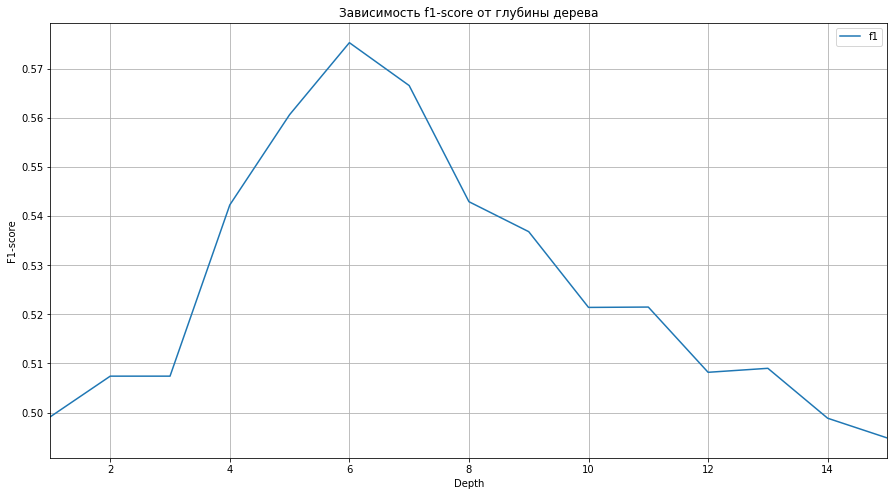

In [137]:
depth_f1 = pd.DataFrame({'depth': depths, 'f1': f1})

depth_f1.plot.line(x = 'depth', y = 'f1', grid = True, figsize = (15,8))
plt.title('Зависимость f1-score от глубины дерева')
plt.xlabel('Depth')
plt.ylabel('F1-score')
plt.show()

In [138]:
print('Глубина наилучшего дерева решений:', best_depth)
print('F1-score наилучшего дерева решений:', best_result)

Глубина наилучшего дерева решений: 6
F1-score наилучшего дерева решений: 0.5752688172043011


### Лес решений

Запустим обучение модели "Случайный лес" для разного числа деревьев и разных глубин. Начнём с подбора с подбора глубины при небольшом числе деревьев.

In [139]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 16, 1):
    model = RandomForestClassifier(n_estimators=20, max_depth=depth, random_state=12345)
    model.fit(features_upsampled_train, target_upsampled_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('Глубина наилучшего дерева решений:', best_depth)
print('F1-score наилучшего леса решений:', best_result)

Глубина наилучшего дерева решений: 8
F1-score наилучшего леса решений: 0.6282828282828282


Теперь с наилучшей глубиной будем искать наилучшее число деревьев.

In [140]:
ests = []
f1 = []
best_model = None
best_result = 0
best_est = 0
for est in range(20, 200, 10):
    ests.append(est)
    model = RandomForestClassifier(n_estimators=est, max_depth=best_depth, random_state=12345)
    model.fit(features_upsampled_train, target_upsampled_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    f1.append(result)
    print('max_est =', est, ":", result)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

max_est = 20 : 0.6282828282828282
max_est = 30 : 0.619718309859155
max_est = 40 : 0.6236125126135217
max_est = 50 : 0.6208291203235592
max_est = 60 : 0.6234817813765182
max_est = 70 : 0.624113475177305
max_est = 80 : 0.6220871327254306
max_est = 90 : 0.6186612576064908
max_est = 100 : 0.625254582484725
max_est = 110 : 0.6218144750254843
max_est = 120 : 0.6244897959183674
max_est = 130 : 0.6188068756319515
max_est = 140 : 0.6192893401015229
max_est = 150 : 0.6208291203235592
max_est = 160 : 0.6215943491422806
max_est = 170 : 0.619718309859155
max_est = 180 : 0.6209677419354838
max_est = 190 : 0.6243705941591137


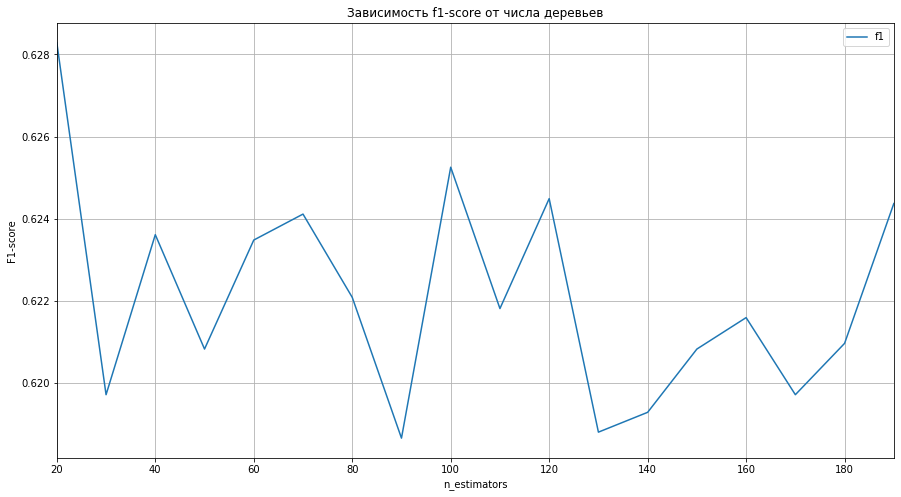

In [141]:
depth_f1 = pd.DataFrame({'est': ests, 'f1': f1})

depth_f1.plot.line(x = 'est', y = 'f1', grid = True, figsize = (15,8))
plt.title('Зависимость f1-score от числа деревьев')
plt.xlabel('n_estimators')
plt.ylabel('F1-score')
plt.show()

In [142]:
print("F1-score наилучшей модели случайного леса:", best_result)
print("Число деревьев наилучшей модели случайного леса:", best_est)

F1-score наилучшей модели случайного леса: 0.6282828282828282
Число деревьев наилучшей модели случайного леса: 20


In [143]:
model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_upsampled_train, target_upsampled_train)
predictions_valid = model.predict(features_valid)
result = f1_score(target_valid, predictions_valid)

print("F1-score модели логистической регрессии:", result)

F1-score модели логистической регрессии: 0.5068493150684932


### Вывод

В результате исследования различных моделей: 
* Дерево решений:
    * Глубина наилучшего дерева решений: 6
    * F1-score наилучшего дерева решений: 0.5752688172043011
* Случайный лес:
    * F1-score наилучшей модели случайного леса: 0.6282828282828282
    * Число деревьев и максимальная глубина наилучшей модели случайного леса: 20 и 8
* Логистическая регрессия:
    * F1-score модели логистической регрессии: 0.5068493150684932
    
Модель случайного леса с числом деревьев, равным 20, и с  максимальной глубиной, равной 8, лучшая по качеству.

## Тестирование модели

Cоздадим переменные для признаков и целевого признака для тестовой выборки.

In [144]:
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Проведём финальное тестирование.

In [145]:
model = RandomForestClassifier(n_estimators=20, max_depth=9, random_state=12345)
model.fit(features_upsampled_train, target_upsampled_train)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print('F1-score дерева решений на тестовой выборке:', result)

F1-score дерева решений на тестовой выборке: 0.6234042553191489


Построим ROC-кривую.

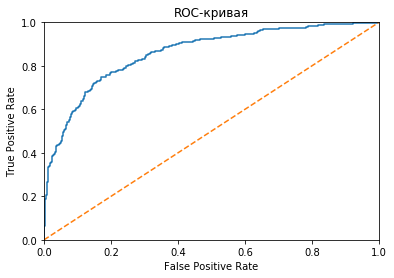

In [146]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()

Посчитаем AUC-ROC.

In [147]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(auc_roc)

0.8591966388576556


### Общий вывод

Финальная модель доведена до метрики, равной 0.62 (F1-мера). Это большое значение, свидетельствующее о высоком качестве, следовательно, поможет точнее предсказывать, уйдёт клиент из банка в ближайшее время или нет.
ROC-кривая показывает, что график выше, тем больше значение TPR и лучше качество модели. Чтобы выявить, как сильно наша модель отличается от случайной, посчитали площадь под ROC-кривой — AUC-ROC. Она равна 0.86.